In [60]:
import cantera as ct
import numpy as np
from Tools import *
from matplotlib.lines import Line2D

In [8]:


def Sim1D_launch(gas, fuel1, fuel2, oxidizer, all_case, idx_target, idx_non_target, width=0.02, loglevel=0):
    time_list = []
    temp_list = []
    Y_target_list = []
    Y_non_target_list = []
    speed_list = []

    for case in all_case:
        print(case)
        t_list, tem_list, Y, speed = Sim1D(gas, fuel1, fuel2, oxidizer, case, idx_target, idx_non_target, width, loglevel)
        time_list.append(t_list)
        temp_list.append(tem_list)
        Y_target_list.append(Y[np.array(idx_target),:])
        Y_non_target_list.append(Y[np.array(idx_non_target),:])
        speed_list.append(speed)
    
    
    return time_list, temp_list, Y_target_list, Y_non_target_list, speed_list


def Sim1D(gas, fuel1, fuel2, oxidizer, case, idx_target, idx_non_target, width=0.02, loglevel=1):
    pressure, temperature, equivalence_ratio, mixture = case
    
    fuel_mix = f'{fuel1}:{mixture}, {fuel2}:{1-mixture}'
    gas.set_equivalence_ratio(equivalence_ratio, fuel_mix, oxidizer)
    gas.TP = temperature, pressure
    
    flame = ct.FreeFlame(gas, width=width)
    flame.set_refine_criteria(ratio=2, slope=0.1, curve=0.2)
    flame.solve(loglevel=loglevel, auto=True)
    
    speed = flame.velocity
    z = flame.grid
    temp = flame.T
    Y = flame.Y
    
    # Vérifiez la dimension de Y
    print("Dimensions de Y:", Y.shape)
    print("Dimensions de z:", len(z))
    print("Dimensions de temp:", len(temp))
    
    
    return z, temp, Y, speed


In [9]:
Detailed_gas = ct.Solution("detailed.yaml")
Reduced_gas = ct.Solution("reduced.yaml")
Optim_A = ct.Solution("STEC_A.yaml")
Optim_B = ct.Solution("STEC_B.yaml")


/tmp/ipykernel_101116/3524593523.py:1: UserWarning: NasaPoly2::validate: 
For species OHV, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  Detailed_gas = ct.Solution("detailed.yaml")


In [10]:

Targets = ["H2", "NH3", "O2", "OH","NO", 'H2O','NO2', 'N2O','N2']
Non_Target = ['H', 'O', 'HO2', 'N', 'N2H2', 'HNO',"NH","NH2","NNH"]
idx_target_det = spcs_name_idx(Detailed_gas,Targets)
idx_target_red = spcs_name_idx(Reduced_gas,Targets)
idx_target_optimA = spcs_name_idx(Optim_A,Targets)
idx_target_optimB = spcs_name_idx(Optim_B,Targets)

idx_non_target_det = spcs_name_idx(Detailed_gas,Non_Target)
idx_non_target_red = spcs_name_idx(Reduced_gas,Non_Target)
idx_non_target_optimA = spcs_name_idx(Optim_A,Non_Target)
idx_non_target_optimB = spcs_name_idx(Optim_B,Non_Target)


In [11]:
pressure = np.linspace(1,1,1).tolist()
temperature = np.linspace(298,298,1).tolist()
phi = np.round(np.linspace(0.5, 2.0, 8), 1).tolist()
mixture =np.linspace(0.85,0.85,1).tolist()
case = generate_test_cases_bifuel(temperature,pressure,phi,mixture)

In [12]:
fuel1 = "NH3"
fuel2 ="H2"
oxidizer = 'O2:0.21, N2:0.79, AR : 0.01' 

In [13]:
time_det, temp_det, Y_target_det, Y_non_target_det, speed_det = Sim1D_launch(Detailed_gas,fuel1,fuel2,oxidizer,case,idx_target_det,idx_non_target_det)

(101325.0, 298.0, 0.5, 0.85)
Dimensions de Y: (33, 119)
Dimensions de z: 119
Dimensions de temp: 119
(101325.0, 298.0, 0.7, 0.85)
Dimensions de Y: (33, 115)
Dimensions de z: 115
Dimensions de temp: 115
(101325.0, 298.0, 0.9, 0.85)
Dimensions de Y: (33, 106)
Dimensions de z: 106
Dimensions de temp: 106
(101325.0, 298.0, 1.1, 0.85)
Dimensions de Y: (33, 102)
Dimensions de z: 102
Dimensions de temp: 102
(101325.0, 298.0, 1.4, 0.85)
Dimensions de Y: (33, 99)
Dimensions de z: 99
Dimensions de temp: 99
(101325.0, 298.0, 1.6, 0.85)
Dimensions de Y: (33, 96)
Dimensions de z: 96
Dimensions de temp: 96
(101325.0, 298.0, 1.8, 0.85)
Dimensions de Y: (33, 96)
Dimensions de z: 96
Dimensions de temp: 96
(101325.0, 298.0, 2.0, 0.85)
Dimensions de Y: (33, 94)
Dimensions de z: 94
Dimensions de temp: 94


In [35]:
time_red, temp_red, Y_target_red, Y_non_target_red, speed_red = Sim1D_launch(Reduced_gas,fuel1,fuel2,oxidizer,case,idx_target_red,idx_non_target_red)

(101325.0, 298.0, 0.5, 0.85)
Dimensions de Y: (19, 99)
Dimensions de z: 99
Dimensions de temp: 99
(101325.0, 298.0, 0.7, 0.85)
Dimensions de Y: (19, 93)
Dimensions de z: 93
Dimensions de temp: 93
(101325.0, 298.0, 0.9, 0.85)
Dimensions de Y: (19, 94)
Dimensions de z: 94
Dimensions de temp: 94
(101325.0, 298.0, 1.1, 0.85)
Dimensions de Y: (19, 92)
Dimensions de z: 92
Dimensions de temp: 92
(101325.0, 298.0, 1.4, 0.85)
Dimensions de Y: (19, 93)
Dimensions de z: 93
Dimensions de temp: 93
(101325.0, 298.0, 1.6, 0.85)
Dimensions de Y: (19, 89)
Dimensions de z: 89
Dimensions de temp: 89
(101325.0, 298.0, 1.8, 0.85)
Dimensions de Y: (19, 88)
Dimensions de z: 88
Dimensions de temp: 88
(101325.0, 298.0, 2.0, 0.85)
Dimensions de Y: (19, 86)
Dimensions de z: 86
Dimensions de temp: 86


In [36]:
time_A, temp_A, Y_target_A, Y_non_target_A, speed_A = Sim1D_launch(Optim_A,fuel1,fuel2,oxidizer,case,idx_target_optimA,idx_non_target_optimA)

(101325.0, 298.0, 0.5, 0.85)
Dimensions de Y: (19, 98)
Dimensions de z: 98
Dimensions de temp: 98
(101325.0, 298.0, 0.7, 0.85)
Dimensions de Y: (19, 94)
Dimensions de z: 94
Dimensions de temp: 94
(101325.0, 298.0, 0.9, 0.85)
Dimensions de Y: (19, 94)
Dimensions de z: 94
Dimensions de temp: 94
(101325.0, 298.0, 1.1, 0.85)
Dimensions de Y: (19, 92)
Dimensions de z: 92
Dimensions de temp: 92
(101325.0, 298.0, 1.4, 0.85)
Dimensions de Y: (19, 92)
Dimensions de z: 92
Dimensions de temp: 92
(101325.0, 298.0, 1.6, 0.85)
Dimensions de Y: (19, 90)
Dimensions de z: 90
Dimensions de temp: 90
(101325.0, 298.0, 1.8, 0.85)
Dimensions de Y: (19, 88)
Dimensions de z: 88
Dimensions de temp: 88
(101325.0, 298.0, 2.0, 0.85)
Dimensions de Y: (19, 86)
Dimensions de z: 86
Dimensions de temp: 86


In [37]:
time_B, temp_B, Y_target_B, Y_non_target_B, speed_B= Sim1D_launch(Optim_B,fuel1,fuel2,oxidizer,case,idx_target_optimB,idx_non_target_optimB)

(101325.0, 298.0, 0.5, 0.85)
Dimensions de Y: (19, 95)
Dimensions de z: 95
Dimensions de temp: 95
(101325.0, 298.0, 0.7, 0.85)
Dimensions de Y: (19, 95)
Dimensions de z: 95
Dimensions de temp: 95
(101325.0, 298.0, 0.9, 0.85)
Dimensions de Y: (19, 101)
Dimensions de z: 101
Dimensions de temp: 101
(101325.0, 298.0, 1.1, 0.85)
Dimensions de Y: (19, 91)
Dimensions de z: 91
Dimensions de temp: 91
(101325.0, 298.0, 1.4, 0.85)
Dimensions de Y: (19, 95)
Dimensions de z: 95
Dimensions de temp: 95
(101325.0, 298.0, 1.6, 0.85)
Dimensions de Y: (19, 91)
Dimensions de z: 91
Dimensions de temp: 91
(101325.0, 298.0, 1.8, 0.85)
Dimensions de Y: (19, 87)
Dimensions de z: 87
Dimensions de temp: 87
(101325.0, 298.0, 2.0, 0.85)
Dimensions de Y: (19, 87)
Dimensions de z: 87
Dimensions de temp: 87


In [38]:
_sl_det = []
_sl_red =[] 
_sl_A = []
_sl_B=[]
for c in range(len(case)) : 
    _sl_det.append(speed_det[c][0]*100)
    _sl_red.append(speed_red[c][0]*100)
    _sl_A.append(speed_A[c][0]*100)
    _sl_B.append(speed_B[c][0]*100)


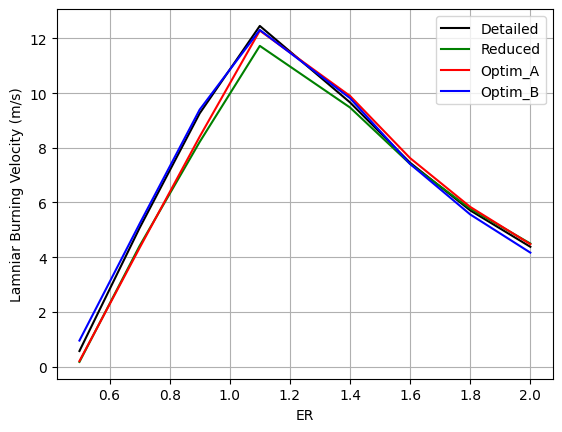

In [41]:
plt.plot(phi,_sl_det,'k',label="Detailed")
plt.plot(phi,_sl_red,'g',label="Reduced")
plt.plot(phi,_sl_A,'r',label="Optim_A")
plt.plot(phi,_sl_B,'b',label="Optim_B")
plt.legend()
plt.xlabel("ER")
plt.ylabel("Lamniar Burning Velocity (m/s)")
plt.grid()

In [42]:
def shift_sl(temp,time,case) :
    output1 = []
    output2=[] 
    for c in range(len(case)) : 
        _loc_time = time[c]
        _loc_temp = temp[c]
        shift_grid = _loc_time-_loc_time[np.argmax(np.gradient(_loc_temp,_loc_time))]
        output1.append(shift_grid)
        output2.append(np.linspace(min(shift_grid),max(shift_grid),100))
    return output1,output2

In [43]:
New_time_det,New_time_det_scal = shift_sl(temp_det,time_det,case)
New_time_red,New_time_red_scal = shift_sl(temp_red,time_red,case)
New_time_A,New_time_A_scal = shift_sl(temp_A,time_A,case)
New_time_B,New_time_B_scal = shift_sl(temp_B,time_B,case)

In [45]:
def interp_Y_sl(data_grid,data_value,commun_grid,case,list_spec):
    output = []
    for c in range(len(case)): 
        loc_grid = np.array(data_grid[c])
        loc_data_value= np.array(data_value[c])
        loc_commun_grid = np.array(commun_grid[c])
        
        output_loc =[]   
        for spec in range(len(list_spec)) :
            loc_loc_data_value = loc_data_value[spec]
            int_func = interp1d(loc_grid,loc_loc_data_value,fill_value="extrapolate")
            output_loc.append(int_func(loc_commun_grid))
            
        output.append(output_loc)
    return output

In [58]:
Y_Target_det_interp = interp_Y_sl(New_time_det,Y_target_det,New_time_det_scal,case,Targets)
Y_Target_red_interp = interp_Y_sl(New_time_red,Y_target_red,New_time_det_scal,case,Targets)
Y_Target_A_interp = interp_Y_sl(New_time_A,Y_target_A,New_time_det_scal,case,Targets)

Y_Target_B_interp = interp_Y_sl(New_time_B,Y_target_B,New_time_det_scal,case,Targets)


In [59]:
Y_target = np.abs(np.array(Y_Target_det_interp) -np.array(Y_Target_red_interp))
Y_target_optimA= np.abs(np.array(Y_Target_det_interp) -np.array(Y_Target_A_interp))
Y_target_optimB= np.abs(np.array(Y_Target_det_interp) -np.array(Y_Target_B_interp))

/tmp/ipykernel_101116/3649138951.py:31: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([1e-5,0])


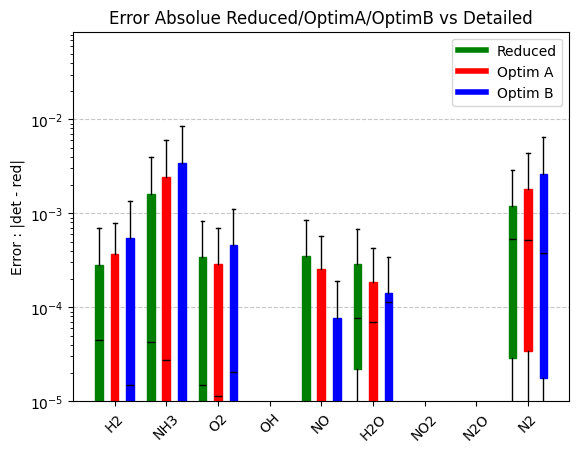

In [65]:
for spec in range(len(Targets)):
    # On récupère les erreurs pour chaque espèce et on les aplatie
    data = np.array(Y_target[:, spec, :]).flatten()
    data_optim1= np.array(Y_target_optimA[:, spec, :]).flatten()
    data_optim2= np.array(Y_target_optimB[:, spec, :]).flatten()
    
    # Création du box plot pour l'espèce spécifiée
    plt.boxplot(data, positions=[spec + 1 -0.3], showfliers=False, patch_artist=True,
                boxprops=dict(facecolor='green', color='green'),
                medianprops=dict(color='black'))
    
    plt.boxplot(data_optim1, positions=[spec + 1], showfliers=False, patch_artist=True,
                boxprops=dict(facecolor='red', color='red'),
                medianprops=dict(color='black'))
    plt.boxplot(data_optim2, positions=[spec + 1+0.3], showfliers=False, patch_artist=True,
                boxprops=dict(facecolor='blue', color='blue'),
                medianprops=dict(color='black'))
legend_elements = [
    
    Line2D([0], [0], color='green', lw=4, label='Reduced'),
    Line2D([0], [0], color='red', lw=4, label='Optim A'),
    Line2D([0], [0], color='blue', lw=4, label='Optim B')
] 
plt.legend(handles=legend_elements)
# Configuration de l'axe X avec les noms des espèces
plt.xticks(ticks=range(1, 10), labels=Targets, rotation=45)
plt.ylabel("Error : |det - red|")
plt.title("Error Absolue Reduced/OptimA/OptimB vs Detailed")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.yscale("log")
plt.ylim([1e-5,0])
plt.savefig("BoxPlot_Species_SF.jpeg")

In [69]:
def standard_sl(data_value,case,list_spec): 
    output = []
    scaler = []
    for c in range(len(case)) : 
        loc_data_value= np.array(data_value[c])
        output_loc =[]
        scaler_loc=[]
        
        for spec in range(len(list_spec)) :
            scl = MinMaxScaler()

            loc_loc_data_value = loc_data_value[spec]
            scl.fit(loc_loc_data_value)
            output_loc.append(scl.transform(loc_loc_data_value))
            scaler_loc.append(scl)
        output.append(output_loc)
        scaler.append(scaler_loc)
    return output,scaler
 

def standard_rdc_sl(data_value,case,list_spec,list_scaler) : 
    output = [] 
    for c in range(len(case)) : 
        loc_data_value = np.array(data_value[c])
        loc_scal = list_scaler[c]
        output_loc =[]
        
        for spec in range(len(list_spec)): 
            loc_loc_data_value = loc_data_value[spec]
            scl = loc_scal[spec]
            output_loc.append(scl.transform(loc_loc_data_value))
        
        output.append(output_loc)
    return output 

In [70]:
Y_Target_det_interp_scal,scl = standard_sl(Y_Target_det_interp,case,Targets)

Y_Target_red_interp_scal =  standard_rdc_sl(Y_Target_red_interp,case,Targets,scl)
Y_Target_A_interp_scal =  standard_rdc_sl(Y_Target_A_interp,case,Targets,scl) 

Y_Target_B_interp_scal =  standard_rdc_sl(Y_Target_B_interp,case,Targets,scl) 

In [71]:
Y_target_scl = np.abs(np.array(Y_Target_det_interp_scal) -np.array(Y_Target_red_interp_scal))
Y_target_optimA_scl= np.abs(np.array(Y_Target_det_interp_scal) -np.array(Y_Target_A_interp_scal))
Y_target_optimB_scl= np.abs(np.array(Y_Target_det_interp_scal) -np.array(Y_Target_B_interp_scal))

/tmp/ipykernel_101116/1056351400.py:31: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([1e-5,0])


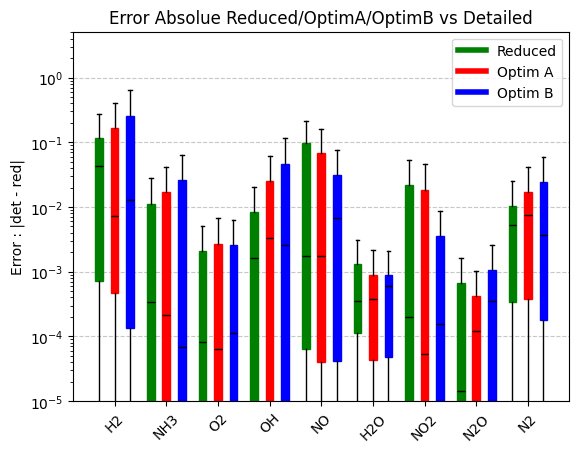

In [73]:
for spec in range(len(Targets)):
    # On récupère les erreurs pour chaque espèce et on les aplatie
    data = np.array(Y_target_scl[:, spec, :]).flatten()
    data_optim1= np.array(Y_target_optimA_scl[:, spec, :]).flatten()
    data_optim2= np.array(Y_target_optimB_scl[:, spec, :]).flatten()
    
    # Création du box plot pour l'espèce spécifiée
    plt.boxplot(data, positions=[spec + 1 -0.3], showfliers=False, patch_artist=True,
                boxprops=dict(facecolor='green', color='green'),
                medianprops=dict(color='black'))
    
    plt.boxplot(data_optim1, positions=[spec + 1], showfliers=False, patch_artist=True,
                boxprops=dict(facecolor='red', color='red'),
                medianprops=dict(color='black'))
    plt.boxplot(data_optim2, positions=[spec + 1+0.3], showfliers=False, patch_artist=True,
                boxprops=dict(facecolor='blue', color='blue'),
                medianprops=dict(color='black'))
legend_elements = [
    
    Line2D([0], [0], color='green', lw=4, label='Reduced'),
    Line2D([0], [0], color='red', lw=4, label='Optim A'),
    Line2D([0], [0], color='blue', lw=4, label='Optim B')
] 
plt.legend(handles=legend_elements)
# Configuration de l'axe X avec les noms des espèces
plt.xticks(ticks=range(1, 10), labels=Targets, rotation=45)
plt.ylabel("Error : |det - red|")
plt.title("Error Absolue Reduced/OptimA/OptimB vs Detailed")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.yscale("log")
plt.ylim([1e-5,0])
plt.savefig("BoxPlot_Species_SF.jpeg")